# Rain Gauge Quality Comparison - Research Grade Rain Gauges

<b>Maggie Zoerner</b> </br>
SULI Intern</br>
Argonne National Laboratory</br>
Summer 2023</br>

This notebook is a case study for the light to moderate rainfall that occurred at the ATMOS site on June 11, 12, and 13, 2023! We will compare the performance of the research grade rain gauges, including: 
* Met One 8in Tipping Bucket Rain Gauge
* Met One Wind Shielded 8in Tipping Bucket Rain Gauge
* Belfort Weighing Bucket Rain Gauge
* NovaLynx 12in Tipping Bucket Rain Gauge
* Optical Scientific (OSi) Optical Rain Gauge (ORG)
* OSi All Precipitation Gauge (APG)
* FD70 Forward Scatter Sensor

These are also compared to the average of the three CoCoRaHS gauges we have on site.

## Import libraries

In [2]:
import numpy as np
import pandas as pd
import xarray as xr 
import os
import matplotlib.pyplot as plt

## Import ORG/APG Data

In [3]:
ORGAPG_files = "C:/Users/maggi/ANL_Internship_2023/ORG_APG/ORGAPG_0611/*.nc"

In [4]:
ORGAPG_ds = xr.open_mfdataset(ORGAPG_files)

### ORG Data

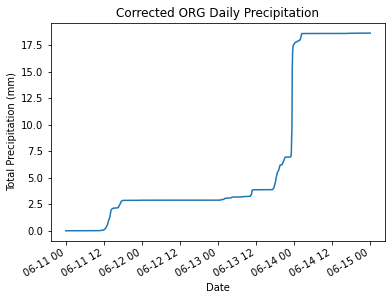

In [5]:
ORG_precip = ORGAPG_ds.ORG_Precip_Accum - ORGAPG_ds.ORG_Precip_Accum[0]
ORG_precip.plot()
plt.title('Corrected ORG Daily Precipitation')
plt.xlabel('Date')
plt.ylabel('Total Precipitation (mm)')
plt.show()

### APG Data

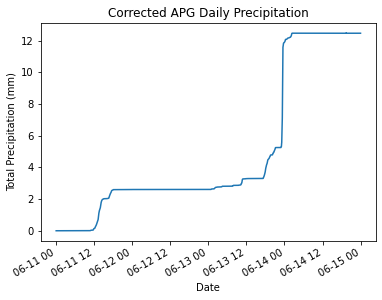

In [6]:
APG_precip = ORGAPG_ds.APG_Precip_Accum - ORGAPG_ds.APG_Precip_Accum[0]
APG_precip.plot()
plt.title('Corrected APG Daily Precipitation')
plt.xlabel('Date')
plt.ylabel('Total Precipitation (mm)')
plt.show()

### 12in Tipping Bucket Data

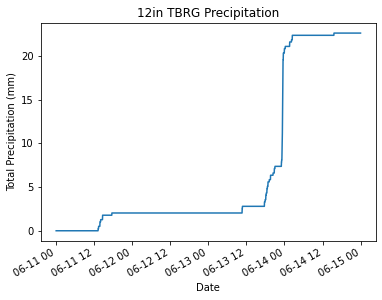

In [7]:
tbrg_12 = np.cumsum(ORGAPG_ds.tb_rain_mm_12in_Tot - ORGAPG_ds.tb_rain_mm_12in_Tot[0])
tbrg_12.plot()
plt.title('12in TBRG Precipitation')
plt.xlabel('Date')
plt.ylabel('Total Precipitation (mm)')
plt.show()

### 8in Tipping Bucket Data

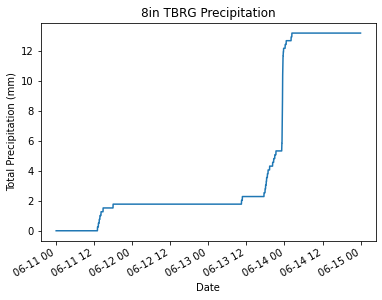

In [8]:
tbrg_8 = np.cumsum(ORGAPG_ds.tb_rain_mm_8in_Tot - ORGAPG_ds.tb_rain_mm_8in_Tot[0])
tbrg_8.plot()
plt.title('8in TBRG Precipitation')
plt.xlabel('Date')
plt.ylabel('Total Precipitation (mm)')
plt.show()

## Import Tower Data

In [9]:
tower_files = "C:/Users/maggi/ANL_Internship_2023/Tower_Rain_Gauge/tower_0611/*.nc"

In [10]:
tower_ds = xr.open_mfdataset(tower_files)

In [11]:
tower_ds = xr.open_mfdataset(tower_files)
tower_ds['time'] = pd.to_datetime(tower_ds['time'])
tower_ds['time'] = tower_ds['time'] + pd.Timedelta(hours=1)

## Plot Tower Data

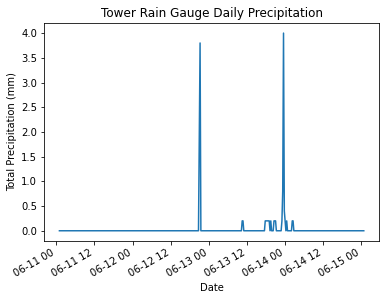

In [12]:
tower_precip = tower_ds.precip
tower_precip.plot()
plt.title('Tower Rain Gauge Daily Precipitation')
plt.xlabel('Date')
plt.ylabel('Total Precipitation (mm)')
plt.show()

Text(0, 0.5, 'Total Precipitation (mm)')

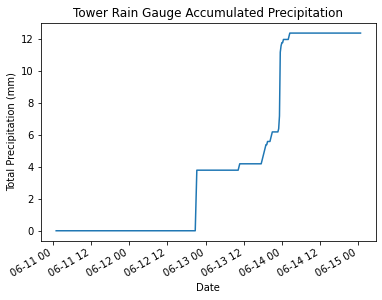

In [13]:
accumulated_tower_precip = np.cumsum(tower_precip)
accumulated_tower_precip.plot()
plt.title('Tower Rain Gauge Accumulated Precipitation')
plt.xlabel('Date')
plt.ylabel('Total Precipitation (mm)')

## Import FD70 Data

In [14]:
FD70_data = 'C:/Users/maggi/ANL_Internship_2023/FD70_Rain_Gauge/FD70_0611/*.nc'
FD70_ds = xr.open_mfdataset(FD70_data)

## Plot FD70 Data

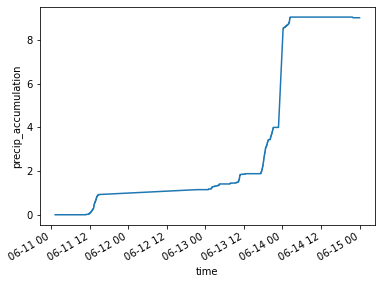

In [15]:
FD70_precip = (FD70_ds.precip_accumulation-FD70_ds.precip_accumulation[0])
FD70_precip.plot()

## Add Belfort Weighted RG Data

In [16]:
belfort_precip = 15.875

## Add CoCoRaHS Standard Gauge Data

In [17]:
cocorahs = 13.0986

## Add Error Percentages for All Gauges

In [18]:
error_fd70 = 2.2
error_novalynx = 1.0
error_metone_8 = 0.5 #use 1.0 for heavy rain (25.4-76.2 mm/hr), and 0.5 for light (<12.7 mm/hr)
error_metone_tower =  1.0 
error_wbrg = 0.5
error_metone_12 = 0.5 #use 2.0 for heavy rain (< 76.2 mm/hr), and 0.5 for light (<12.7 mm/hr)
error_org = 5.0
error_apg = 5.0
error_crh = 4.0

## Plot data from all rain gauges

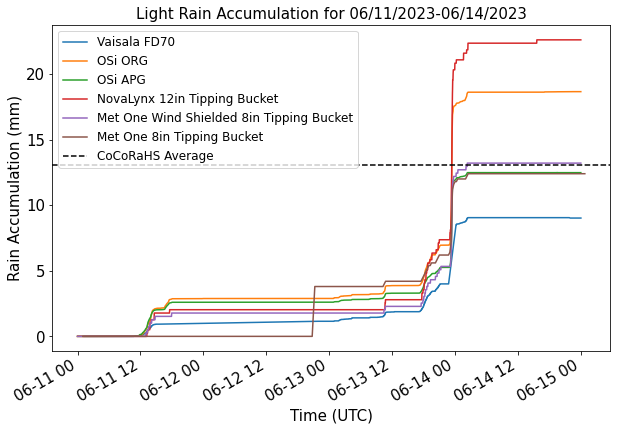

In [19]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6))

FD70_precip.plot(ax=ax1, label='Vaisala FD70')
ORG_precip.plot(ax=ax1, label='OSi ORG')
APG_precip.plot(ax=ax1, label='OSi APG')
tbrg_12.plot(ax=ax1, label='NovaLynx 12in Tipping Bucket')
tbrg_8.plot(ax=ax1, label='Met One Wind Shielded 8in Tipping Bucket')
accumulated_tower_precip.plot(ax=ax1, label='Met One 8in Tipping Bucket')
plt.axhline(cocorahs, color='black', linestyle='--', label='CoCoRaHS Average')
#metone_12in_precip.plot(ax=ax1, label = 'Met One 12in Tipping Bucket')

ax1.set_title('Light Rain Accumulation for 06/11/2023-06/14/2023', fontsize=15)
ax1.set_xlabel('Time (UTC)', fontsize=15)
ax1.set_ylabel('Rain Accumulation (mm)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax1.legend(fontsize=12, loc = 'best')
# Show the two plots
plt.show()

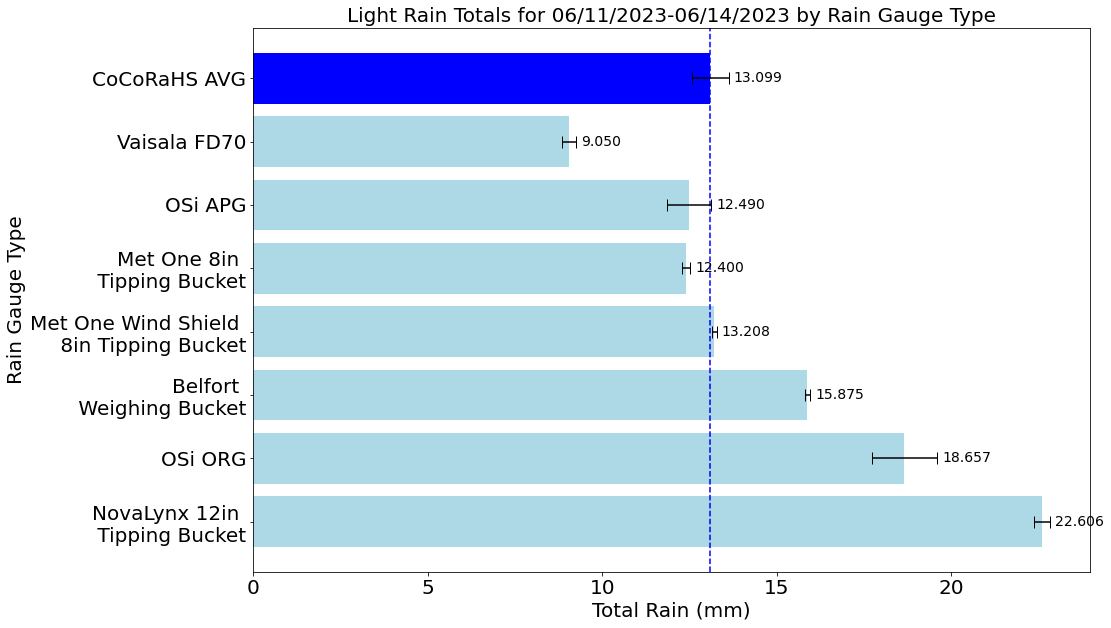

In [20]:
rain_gauge_labels = ['NovaLynx 12in \n Tipping Bucket', 'OSi ORG', 'Belfort \n Weighing Bucket', 'Met One Wind Shield \n 8in Tipping Bucket', 'Met One 8in \n Tipping Bucket', 'OSi APG','Vaisala FD70']
rainfall_amounts = [tbrg_12.max(), ORG_precip.max(), belfort_precip, tbrg_8.max(), accumulated_tower_precip.max(), APG_precip.max(),  FD70_precip.max()]

fig = plt.figure(figsize = (15, 10))
ax=fig.add_subplot(111)
all_rg_bar=plt.barh(rain_gauge_labels, rainfall_amounts, color ='lightblue')

# Adding and plotting the CoCoRaHS data
crh_bar=ax.barh(['CoCoRaHS AVG'], [cocorahs], color='b')

# Add a line to be able to more clearly visualize the "true" value of the total event rainfall
plt.axvline(x = cocorahs, color = 'b', linestyle='--')

# Add error percentages 
error_percentages = [error_novalynx, error_org, error_wbrg, error_metone_8, error_metone_tower, error_apg, error_fd70]

error_bars = np.array(rainfall_amounts)*np.array(error_percentages)/100

error_bars_crh = cocorahs*error_crh/100

all_rg_bar = ax.barh(rain_gauge_labels, rainfall_amounts, xerr = error_bars, color='lightblue',capsize=6)
ax.bar_label(all_rg_bar, fmt ='%.3f', padding = 5, fontsize = 14)

crh_bar = ax.barh(['CoCoRaHS AVG'], cocorahs, xerr=error_bars_crh, color='b', capsize=6)
ax.bar_label(crh_bar, fmt = '%.3f', padding = 5, fontsize = 14)

# Plot the graph
plt.ylabel("Rain Gauge Type", fontsize=20)
plt.xlabel("Total Rain (mm)", fontsize=20)
plt.title("Light Rain Totals for 06/11/2023-06/14/2023 by Rain Gauge Type", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

## Compare optical rain gauges to determine which detected the rainfall first

### Select the time frame you would like to look at

In [21]:
start_time = '2023-06-11 T11:30:00'
end_time = '2023-06-11 T11:45:00'

### Take slices of the optical rain gauge data for the selected time frame

In [24]:
FD70_onset = FD70_precip.sel(time=slice(start_time, end_time))
ORG_precip_onset = ORG_precip.sel(time=slice(start_time, end_time))
APG_precip_onset = APG_precip.sel(time=slice(start_time, end_time))

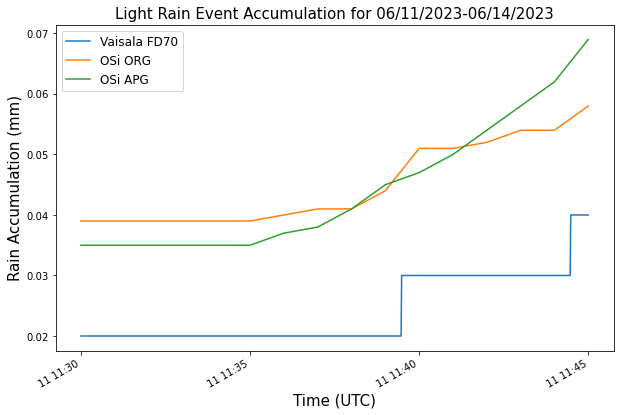

In [23]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10,6))

FD70_onset.plot(ax=ax1, label='Vaisala FD70')
ORG_precip_onset.plot(ax=ax1, label='OSi ORG')
APG_precip_onset.plot(ax=ax1, label='OSi APG')

ax1.set_title('Light Rain Event Accumulation for 06/11/2023-06/14/2023',fontsize=15)
ax1.set_xlabel('Time (UTC)',fontsize=15)
ax1.set_ylabel('Rain Accumulation (mm)',fontsize=15)
ax1.legend(fontsize=12)
# Show the two plots
plt.show()